In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

from preprocess import get_prepared_data

In [6]:
# Get the data
X, y = get_prepared_data(oversample=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# Create and train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions with custom threshold
threshold = 0.60  # Threshold to classify as 1 if probability is greater than or equal to this value
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1
y_pred = (y_proba >= threshold).astype(int)

# Print accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

# Print detailed classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.61

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.98      0.72      1822
           1       0.94      0.24      0.38      1822

    accuracy                           0.61      3644
   macro avg       0.75      0.61      0.55      3644
weighted avg       0.75      0.61      0.55      3644



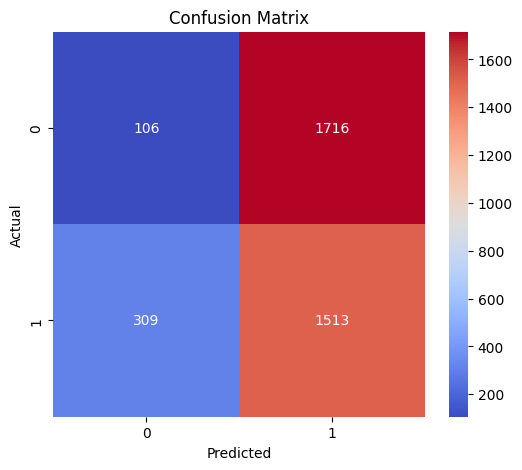

In [8]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True , cmap = "coolwarm",fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test,y_pred)

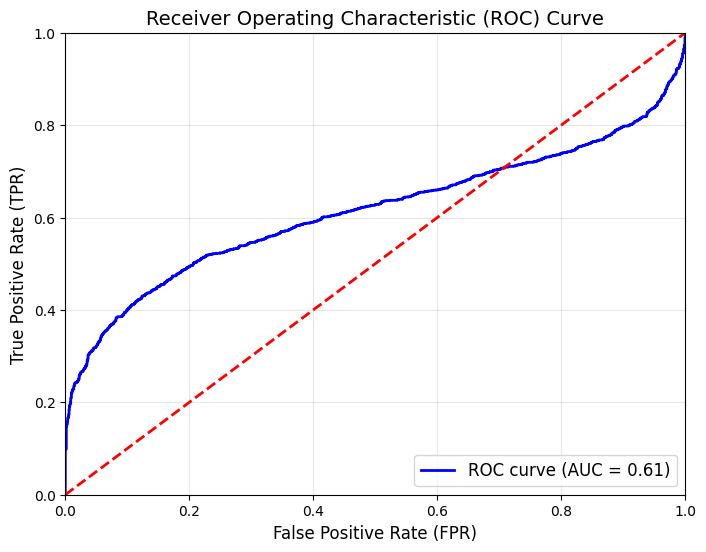

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()